### CNN in Deep Learning using Keras

Xây dựng mạng CNN với Keras để nhận dạng ký tự số viết tay.

Sử dụng tập dữ liệu MNIST có sẵn trong Keras để train

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

Đọc dữ liệu

In [86]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training Data X Shape: {X_train.shape}")
print(f"Training Data y Shape: {y_train.shape}")
print(f"Testing Data X Shape: {X_test.shape}")
print(f"Testing Data y Shape: {y_test.shape}")

Training Data X Shape: (60000, 28, 28)
Training Data y Shape: (60000,)
Testing Data X Shape: (10000, 28, 28)
Testing Data y Shape: (10000,)


Trực quan dữ liệu

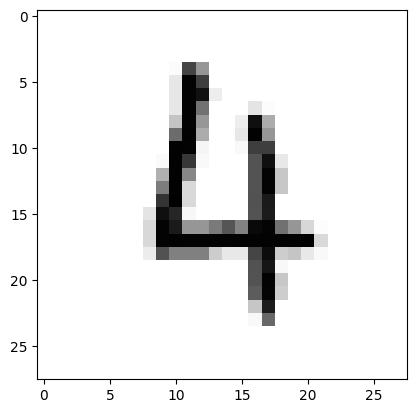

In [87]:
i_image = int(input("Enter the image number to display (Max: 60000): ")) - 1
plt.imshow(X_train[i_image, :, :], cmap='Greys')
plt.show()

Chuẩn bị dữ liệu

Scaling

In [88]:
X_train = X_train / 255
X_test = X_test / 255

Reshape

In [89]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

One-Hot Encoding

In [90]:
n_train_size = X_train.shape[0]

y = np.concatenate([y_train, y_test], axis=0)
y = tf.keras.utils.to_categorical(y, 10)
y_train = y[:n_train_size, :]
y_test = y[n_train_size:, :]

Xây dựng mô hình

In [91]:
drop_prob = 0.5 # 1 channel of grayscale
model = Sequential()
# 1st Convolution + pooling
model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# 2nd Convolution + pooling
model.add(Conv2D(filters=64, input_shape=(28, 28, 1), kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
# Apply dropout
model.add(Dropout(rate=drop_prob))
# Output laye
model.add(Dense(units=10, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

Xác định các siêu tham số và trình tối ưu hóa

In [93]:
n_epochs = 10
batch_size = 200
learn_rate = 0.001

In [94]:
optimizer = Adam(learning_rate=learn_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Huấn luyện

In [95]:
my_summary = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9362 - loss: 0.2062 - val_accuracy: 0.9831 - val_loss: 0.0572
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9831 - loss: 0.0526 - val_accuracy: 0.9864 - val_loss: 0.0432
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.9887 - loss: 0.0367 - val_accuracy: 0.9886 - val_loss: 0.0371
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9912 - loss: 0.0279 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 99ms/step - accuracy: 0.9932 - loss: 0.0224 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.9940 - loss: 0.0175 - val_accuracy: 0.9912 - val_loss: 0.0277
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 25s 104ms/step - accuracy: 0.9950 - loss: 0.0145 - val_accuracy: 0.9911 - val_loss: 0.0323
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - accuracy: 0.9956 - loss: 0.0118

Trực quan hóa quá trình huấn luyện

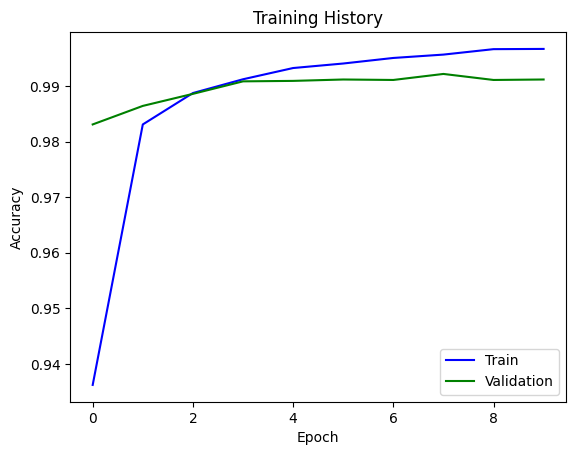

In [96]:
n_skip = 0
plt.plot(my_summary.history['accuracy'][n_skip:], c='b')
plt.plot(my_summary.history['val_accuracy'][n_skip:], c='g')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Kiểm thử

In [98]:
acc = model.evaluate(X_test, y_test, verbose=0)[1]
print(f"Test Accuracy: {np.round(acc, 3)}")

Test Accuracy: 0.993


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


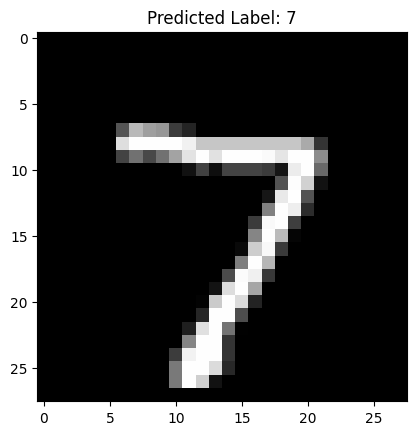

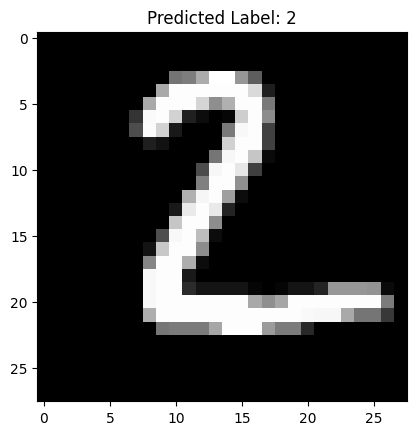

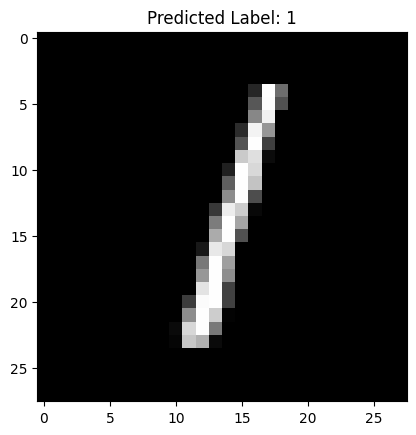

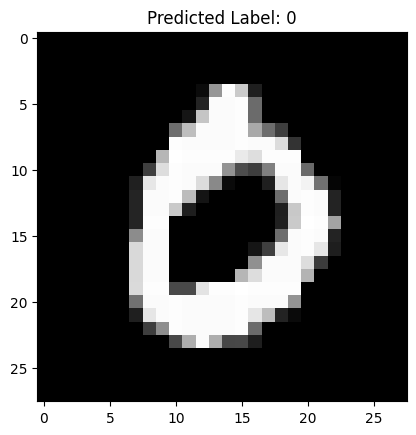

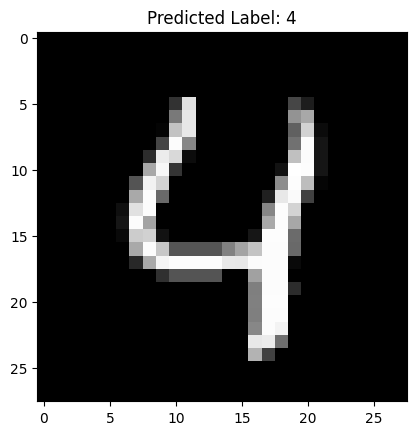

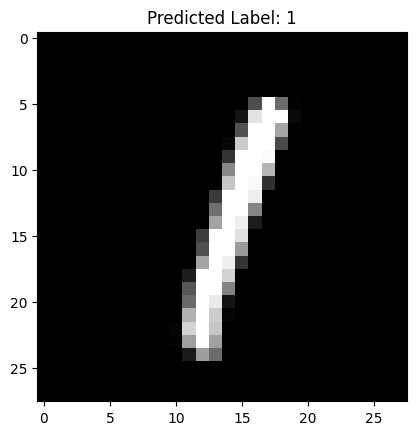

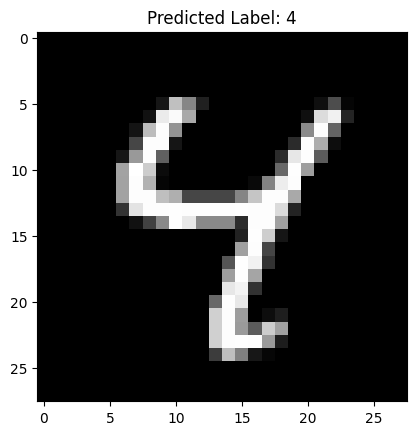

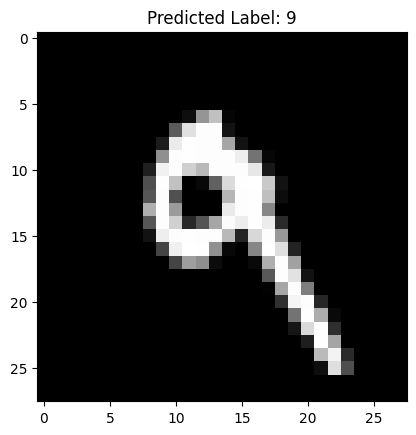

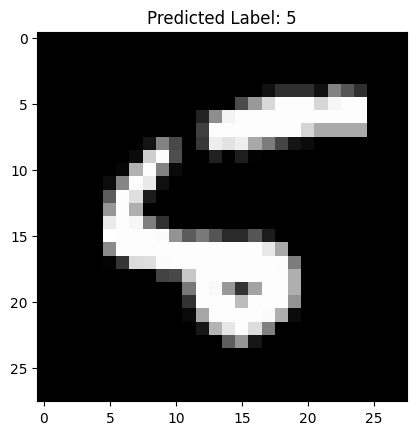

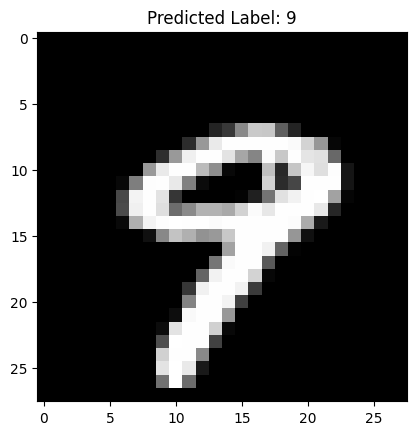

In [102]:
# Make predictions on the test set
predictions = model.predict(X_test)
# The predictions will be in the form of probabilities for each class (0-9)
# To get the predicted class labels, use np.argmax
predicted_labels = np.argmax(predictions, axis=1)

# Example: Show the first 10 test images with their predicted labels
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Label: {predicted_labels[i]}")
    plt.show()